(512, 512, 3)
float64


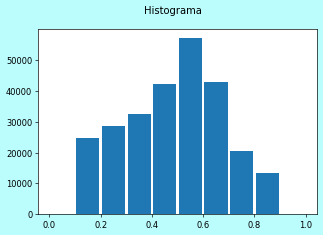

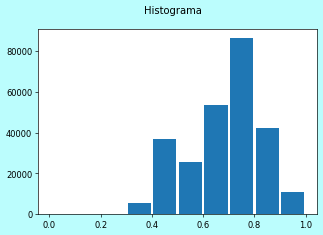

In [1]:
from tkinter import *
from tkinter import filedialog
from PIL import Image
from PIL import ImageTk
import imutils
import numpy as np
import imageio
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def guardar_imagen():
    global imageOutput
    if (selected.get() == 1):
        aux="ImgRaiz2"
    elif (selected.get() == 2):
        aux = "ImgC2"
    elif (selected.get() == 3):
        aux = "ImgRaiz3"
    elif (selected.get() == 4):
        aux = "Img3"
    elif (selected.get() == 5):
        aux = "Lineal a Trozos 0.2-0.8"
    else:
        aux="Ouput"
          
    im = Image.fromarray((imageOutput * 255).astype(np.uint8))
    im.save(f"{aux}imagenOuput.png")
    
##Funcion  de RGB A YIQ
def RGB_to_YIQ(im):
    h,w,c=im.shape # obtenemos el tamaño de la imagen original
    mYIQ = np.zeros((h,w,3)) # creamos una matriz donde generar la imagen
    mYIQ[:,:,0] = 0.299*im[:,:,0] + 0.587*im[:,:,1] + 0.114*im[:,:,2]
    mYIQ[:,:,0] = np.clip(mYIQ[:,:,0], 0, 1)
    mYIQ[:,:,1] = 0.595716*im[:,:,0] + -0.274453*im[:,:,1] + -0.321263*im[:,:,2]
    mYIQ[:,:,1] = np.clip(mYIQ[:,:,1], -0.5957, 0.5957)
    mYIQ[:,:,2] = 0.211456*im[:,:,0] + -0.522591*im[:,:,1] + 0.311135*im[:,:,2]
    mYIQ[:,:,2] = np.clip(mYIQ[:,:,2], -0.5226, 0.5226)
    return mYIQ 

##Funcion  de YIQ A RGB
def YIQ_to_RGB(valoresMatriz):
    im = valoresMatriz
    h,w,c=im.shape # obtenemos el tamaño de la imagen original
    mRGB = np.zeros((h,w,3)) # creamos una matriz donde generar la imagen
    mRGB[:,:,0] = 1*im[:,:,0] + 0.9663*im[:,:,1] + 0.6210*im[:,:,2]
    mRGB[:,:,1] = 1*im[:,:,0] + -0.2721*im[:,:,1] + -0.6474*im[:,:,2]
    mRGB[:,:,2] = 1*im[:,:,0] + -1.1070*im[:,:,1] + 1.7046*im[:,:,2]
    return mRGB

def calculo():
    global image1, imageOutput
    mR=RGB_to_YIQ(image1) # SIST YIQ
    #mR = np.clip(mR, 0, 1)
    #Mostramos Histograma
    #_ = plt.hist(mR[:,:,0].ravel(), bins = 10, range=(0,1), rwidth= 0.9 ) 
    #_ = plt.xlabel('Valor de intensidad') 
    #_ = plt.ylabel('Frecuencia') 
    #plt.show()
    
    #Mostramos Frame YIQ HISTOGRAMA 
    frame = Frame(root, bg='blue')
    frame.grid(column=0,row=3, sticky='nsew')
    fig, axs = plt.subplots(dpi=60, figsize=(6, 4), sharey=True, facecolor='#00f9f844')
    fig.suptitle('Histograma')
    axs.hist(mR[:,:,0].ravel(), bins = 10, range=(0,1), rwidth= 0.9 ) 
    canvas = FigureCanvasTkAgg(fig, master = frame)  # Crea el area de dibujo en Tkinter
    canvas.draw()
    canvas.get_tk_widget().grid(column=0, row=3, padx=5, pady=5)
    
    #Mostramos Frame YIQ HISTOGRAMA ^ 1/2
    mResultante = mR 
    ###SELECCION DE OPERACIONES##
    if selected.get() == 1:
        mResultante[:,:,0]=np.sqrt(mR[:,:,0])
    if selected.get() == 2:
        mResultante[:,:,0]=np.power((mR[:,:,0]), 2)
    if selected.get() == 3:
        mResultante[:,:,0]=np.power((mR[:,:,0]), 1/3)
    if selected.get() == 4:
        mResultante[:,:,0]=np.power((mR[:,:,0]), 3)
    # LINEAL A TROZOS
    if selected.get() == 5:
        #Datos
        yMax=0.8
        yMin=0.2
        puntoB = (yMax, 1) 
        puntoA = (yMin, 0)  
        h,w=mResultante[:,:,0].shape
        for i in range(h):
            for j in range(w):
                if mResultante[i,j,0] < yMin:                               
                    mResultante[i,j,0]=0
                elif mResultante[i,j,0] > yMax: 
                    mResultante[i,j,0]=1
                else:
                    mResultante[i,j,0]=puntoA[1]+(mResultante[i,j,0]-puntoA[0])*((puntoB[1]-puntoA[1])/(puntoB[0]-puntoA[0]))
        
    
    frame1 = Frame(root, bg='blue')
    frame1.grid(column=3,row=3, sticky='nsew')
    fig1, axs1 = plt.subplots(dpi=60, figsize=(6, 4), sharey=True, facecolor='#00f9f844')
    fig1.suptitle('Histograma')
    axs1.hist(mResultante[:,:,0].ravel(), bins = 10, range=(0,1), rwidth= 0.9 ) 
    canvas1 = FigureCanvasTkAgg(fig1, master = frame1)  # Crea el area de dibujo en Tkinter
    canvas1.draw()
    canvas1.get_tk_widget().grid(column=3, row=3, padx=5, pady=5)
    
    #Mostramos imagen modificada
    mResultante = np.clip(mResultante,0,1)
    mC=YIQ_to_RGB(mResultante)
    #mC=np.clip(mResultante,0,1)
    #plt.figure(0)
    #plt.title(" Imagen Lena ORIGINAL")
    #plt.imshow(image1)
    
    #plt.figure(0)
    #plt.title(" Imagen Lena cambios")
    #plt.imshow(mC.astype('float64'))
    array = np.array(mC,dtype=np.float64)
    print(mC.shape)
    print(mC.dtype)
    array = np.clip(array,0,1)
    imageOutput = array
    image = imutils.resize(array, height=480)
    imageToShow = imutils.resize(image, width=200)
    #plt.imshow(imageToShow.astype('float64'))
    #image_file = imageToShow.convert('RGB')
    #im = Image.fromarray(image_file)
    #print(imageToShow.min(), imageToShow.max())
    im = Image.fromarray((imageToShow*255).astype(np.uint8))#
    #im = Image.fromarray(imageToShow)
    img = ImageTk.PhotoImage(image = im)
    lblOuputIm.configure(image=img)
    lblOuputIm.image = img
    pass   

def elegir_imagen():
    #Espercificar los tipos  de archivos, para elegir solo las imagenes
    path_image = filedialog.askopenfilename(filetypes = [
        ("image",".jpg"),
        ("image",".png"),
        ("image",".bmp")])
    if len(path_image)>0:
        global image1
        global image2
        
        #leer la imagen de entrada
        image1 = imageio.imread(path_image)
        image = image1
        image1 =image1/255.0
        
        image = imutils.resize(image, height=480)
        
        #Para visualizar la imagen de entrada en la GUI
        imageToShow = imutils.resize(image, width=200)
        im = Image.fromarray(imageToShow)
        img = ImageTk.PhotoImage(image = im)
        
        lblInputIm1.configure(image=img)
        lblInputIm1.image = img
        
        #label imagen de entrada
        lblInfo1 = Label(root, text=f"Imagen ")
        lblInfo1.grid(column=0, row=1, padx=5, pady=5)

        
image1 = None
imageOutput = None

#Creamos la ventana principal
root = Tk()
root.geometry('1000x680')

#Label donde se presentarala imagen de entrada
lblInputIm1 = Label(root)
lblInputIm1.grid(column=0,row=2)

#Label donde se presentará la imagen de salida
lblOuputIm = Label(root)
lblOuputIm.grid(column=3,row=2)

#LabelDeSalida
lblOutputInfo = Label(root, text="Resultado", width =25)
lblOutputInfo.grid(column=3, row=1, padx=5, pady=5)

#Creamos los radio buttons y la ubicacion que estos ocuparan
selected = IntVar()
rad1 = Radiobutton(root, text="RAIZ CUADRADA", width=25, value=1, variable=selected, command=calculo)
rad2 = Radiobutton(root, text="FCION CUADRATICA Y*Y", width=25, value=2, variable=selected, command=calculo)
rad3 = Radiobutton(root, text="RAIZ CUBICA", width=25, value=3, variable=selected, command=calculo)
rad4 = Radiobutton(root, text="TIPO Y*Y*Y", width=25, value=4, variable=selected, command=calculo)
rad5 = Radiobutton(root, text="LINEAL A TROZOS ", width=25, value=5, variable=selected, command=calculo)
rad1.grid(column=1,row=5)
rad2.grid(column=1,row=6)
rad3.grid(column=1,row=7)
rad4.grid(column=1,row=8)
rad5.grid(column=1,row=9)

#Creamos el boton para elegir la imagen de entrada 
btnIm1 = Button(root, text="ELegir imagen", width=25, command=elegir_imagen)
btnIm1.grid(column=0, row=0, padx=5, pady=5)

btnOuput = Button(root, text="Guardar imagen", width=25, command=guardar_imagen)
btnOuput.grid(column=3, row=0, padx=5, pady=5)

btnSalir = Button(root, text="Salir", bg = '#ebaec6', width= 25, command=root.destroy)
btnSalir.grid(column=3, row=9, padx=5, pady=5)

root.mainloop()